# 311 service requests in New York

Background: 311 is a special telephone number supported in many cities in Canada and the United States. It provides access to non-emergency City services and information about City government programs. Some of the broad range of services include things like homeless person assistance, pothole repair, or help understanding a property tax bill. For New York City, the 311 service requests data is available since 2004 onwards and contains extensive call information such as time of request, location details, responsible city agency etc. 
More information about the data is available:  
https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

Since the data size is huge, you are given records just for the last two months of 2022 for doing the below tasks to get some insights. It can be downloaded here: https://drive.google.com/file/d/1dS7Vajo1xxnglinKR-PXhojJIpBpGTyF/view?usp=sharing

<h3 style="color:green">*Tasks 1, 2, 3 are mandatory. Tasks 3.a and 4 are optional (marked in green)</h3>

# Tasks: 
1. Perform some basic data cleaning  
a. Remove the data records where either of 'incident_zip', 'latitude', 'longitude' columns has missing values or NaN  
b. Filter the 'created_date' column to keep the data just for December 2022.

1. Get the total number of requests for each complaint type ('complaint_type') and plot a pie chart depicting the % share of each complaint type within the total activity and identify the top three complaint types.
1. Plot the hourly distribution of total complaints activity in a bar plot. (Use 'created_date' column to get the hour for each complaint record)  
<span style="color:green">*a. Plot the proportions (%) of the top three complaint types (from task 2.) by each hour in a single bar plot. Each of the three complaint types can be visualized by a separate color. (Use 'created_date' column to get the hour for each complaint record).</span>
<span style="color:green">
1. <span style="color:green">Evaluate the service processing times for city agencies  
a. Get the processing time for each data record. Columns 'created_date' represents the time when the complaint was made and 'closed_date' when it was resolved.   
b .Get the median processing time by each city agency and sort to get the 3 fastest and 3 slowest city agency ('agency_name' column represents city agency)
</span>



# Import libraries and dataset

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("nyc_311_data_2022.csv")

# Clean dataset **(Task 1)**

In [14]:
print(df["longitude"].isna().sum())
print(df["latitude"].isna().sum())
print(df["incident_zip"].isna().sum())

4082
4082
3446


In [45]:
### Drop rows with NaN values within three columns
df = df.dropna(subset=["longitude", "latitude", "incident_zip"])
len(df)

294188

In [46]:
df_dec22 = df[df["created_date"].str[0:7]=="2022-12"]
len(df_dec22)

255772

In [47]:
df_dec22

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,landmark,status,bbl,borough,latitude,longitude
0,56415040,2022-12-31T23:59:25.000,2023-01-01T00:24:01.000,NYPD,New York City Police Department,Illegal Fireworks,NaN,Street/Sidewalk,11218.0,BROOKLYN,OCEAN PARKWAY,Closed,3.053750e+09,BROOKLYN,40.638927,-73.973250
1,56418476,2022-12-31T23:59:13.000,2023-01-01T00:26:51.000,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033.0,NEW YORK,WEST 184 STREET,Closed,1.021650e+09,MANHATTAN,40.851187,-73.932670
2,56415364,2022-12-31T23:59:12.000,2023-01-01T01:00:18.000,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11226.0,BROOKLYN,OCEAN AVENUE,Closed,3.051230e+09,BROOKLYN,40.645124,-73.960077
3,56414786,2022-12-31T23:59:04.000,2023-01-03T07:49:56.000,DOHMH,Department of Health and Mental Hygiene,Rodent,Signs of Rodents,3+ Family Apt. Building,10035.0,NEW YORK,2 AVENUE,Closed,1.017970e+09,MANHATTAN,40.801435,-73.934432
4,56414075,2022-12-31T23:58:52.000,2023-01-01T00:29:43.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11385.0,RIDGEWOOD,CORNELIA STREET,Closed,4.035470e+09,QUEENS,40.699215,-73.906590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260638,56125629,2022-12-01T00:01:00.000,2022-12-01T01:17:24.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11221.0,BROOKLYN,MALCOLM X BOULEVARD,Closed,3.016360e+09,BROOKLYN,40.688335,-73.930144
260639,56129263,2022-12-01T00:00:54.000,2022-12-01T02:16:33.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11233.0,BROOKLYN,STERLING PLACE,Closed,3.013750e+09,BROOKLYN,40.671113,-73.924160
260640,56126881,2022-12-01T00:00:46.000,2022-12-01T00:45:26.000,NYPD,New York City Police Department,Noise - Residential,Loud Television,Residential Building/House,11691.0,FAR ROCKAWAY,SEAGIRT BOULEVARD,Closed,4.158100e+09,QUEENS,40.595156,-73.754689
260641,56131589,2022-12-01T00:00:17.000,2022-12-01T01:52:43.000,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10030.0,NEW YORK,7 AVENUE,Closed,1.020100e+09,MANHATTAN,40.819537,-73.940600


# **Task 2**

In [75]:
top_compl_types = df_dec22.groupby('complaint_type')['unique_key'].count().sort_values(ascending=False)[0:12]

In [76]:
top_compl_types

complaint_type
HEAT/HOT WATER             53795
Illegal Parking            33533
Noise - Residential        21089
Blocked Driveway           14155
UNSANITARY CONDITION        8423
                           ...  
Water System                5062
PAINT/PLASTER               4561
Noise - Street/Sidewalk     4359
Street Light Condition      4268
Noise - Commercial          4264
Name: unique_key, Length: 12, dtype: int64

In [113]:
df_dec22

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,landmark,status,bbl,borough,latitude,longitude,hour
0,56415040,2022-12-31T23:59:25.000,2023-01-01T00:24:01.000,NYPD,New York City Police Department,Illegal Fireworks,NaN,Street/Sidewalk,11218.0,BROOKLYN,OCEAN PARKWAY,Closed,3.053750e+09,BROOKLYN,40.638927,-73.973250,23
1,56418476,2022-12-31T23:59:13.000,2023-01-01T00:26:51.000,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033.0,NEW YORK,WEST 184 STREET,Closed,1.021650e+09,MANHATTAN,40.851187,-73.932670,23
2,56415364,2022-12-31T23:59:12.000,2023-01-01T01:00:18.000,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11226.0,BROOKLYN,OCEAN AVENUE,Closed,3.051230e+09,BROOKLYN,40.645124,-73.960077,23
3,56414786,2022-12-31T23:59:04.000,2023-01-03T07:49:56.000,DOHMH,Department of Health and Mental Hygiene,Rodent,Signs of Rodents,3+ Family Apt. Building,10035.0,NEW YORK,2 AVENUE,Closed,1.017970e+09,MANHATTAN,40.801435,-73.934432,23
4,56414075,2022-12-31T23:58:52.000,2023-01-01T00:29:43.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11385.0,RIDGEWOOD,CORNELIA STREET,Closed,4.035470e+09,QUEENS,40.699215,-73.906590,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260638,56125629,2022-12-01T00:01:00.000,2022-12-01T01:17:24.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11221.0,BROOKLYN,MALCOLM X BOULEVARD,Closed,3.016360e+09,BROOKLYN,40.688335,-73.930144,0
260639,56129263,2022-12-01T00:00:54.000,2022-12-01T02:16:33.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11233.0,BROOKLYN,STERLING PLACE,Closed,3.013750e+09,BROOKLYN,40.671113,-73.924160,0
260640,56126881,2022-12-01T00:00:46.000,2022-12-01T00:45:26.000,NYPD,New York City Police Department,Noise - Residential,Loud Television,Residential Building/House,11691.0,FAR ROCKAWAY,SEAGIRT BOULEVARD,Closed,4.158100e+09,QUEENS,40.595156,-73.754689,0
260641,56131589,2022-12-01T00:00:17.000,2022-12-01T01:52:43.000,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10030.0,NEW YORK,7 AVENUE,Closed,1.020100e+09,MANHATTAN,40.819537,-73.940600,0


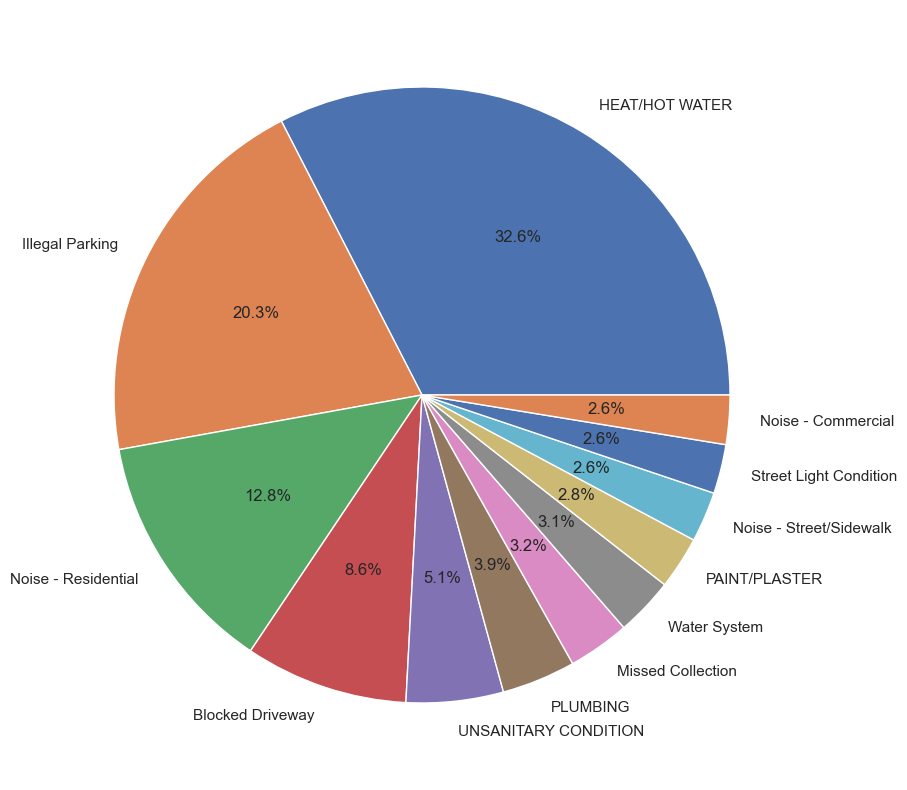

In [166]:
sns.set_theme()
fig = plt.figure(figsize=(20,10))
plt.pie(top_compl_types, labels=top_compl_types.keys(), autopct='%1.1f%%')
plt.patches = []

## Conclusion: Top 3 complaint types are
1. HEAT/HOT Water - 32.6 %
1. Illigal Parking - 20.3 %
1. Noise - Residental - 12.8 %

# **Task 3**

In [112]:
%%capture --no-stdout
df_dec22['hour'] = pd.to_datetime(df_dec22['created_date']).dt.hour

# Group data by hour and count occurrences
hourly_counts = df_dec22['hour'].value_counts().sort_index()

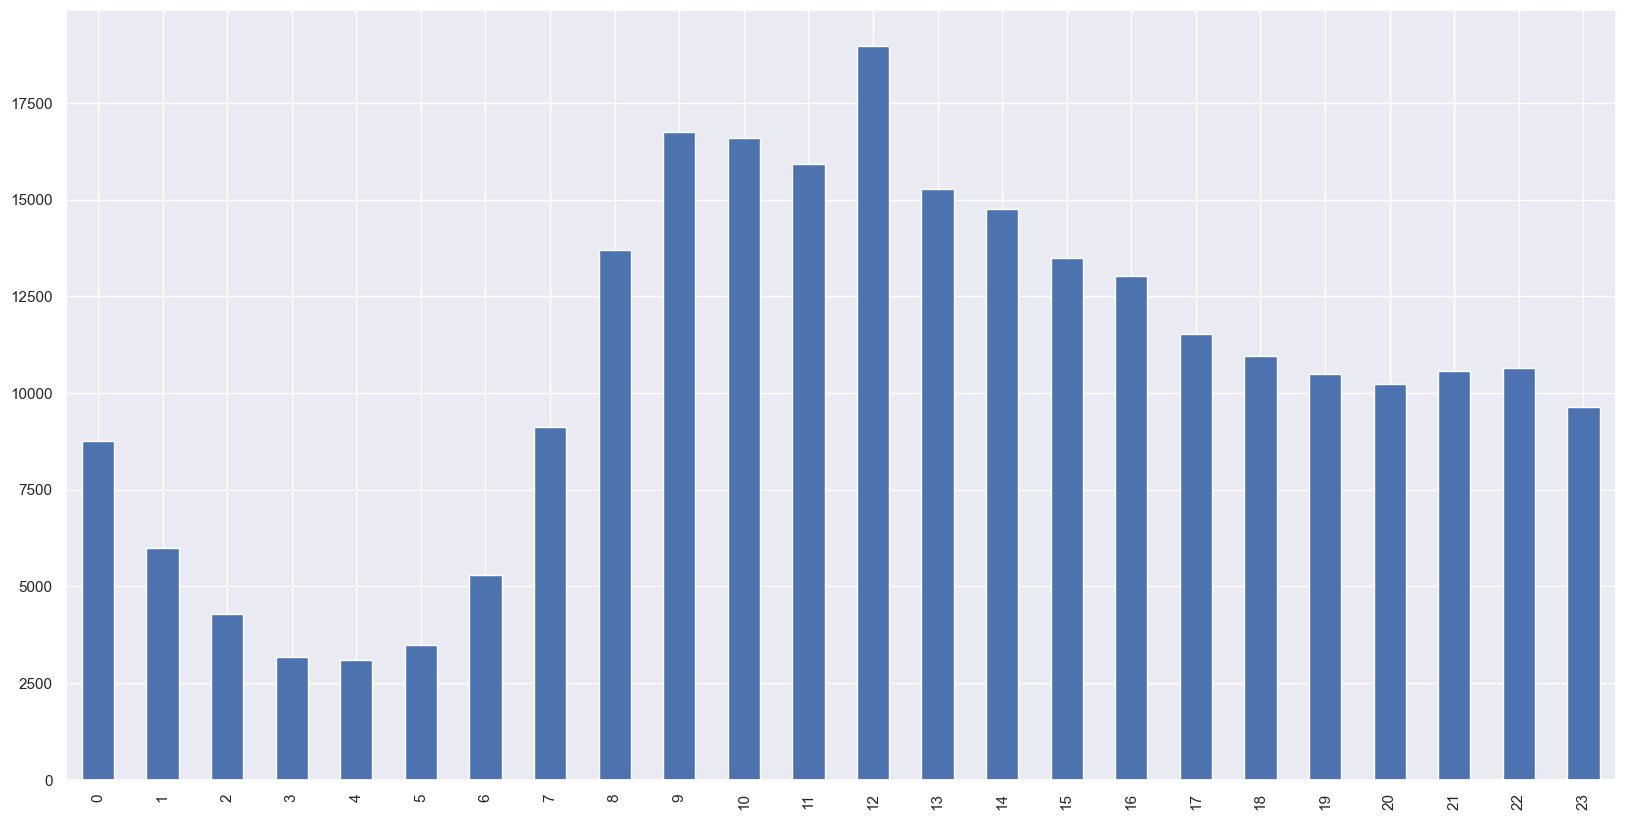

In [111]:
sns.set_theme()
fig=plt.figure(figsize=(20,10))
hourly_counts.plot(kind="bar")
plt.patches=[]

## **Task 3 (\*a)**

<AxesSubplot:>

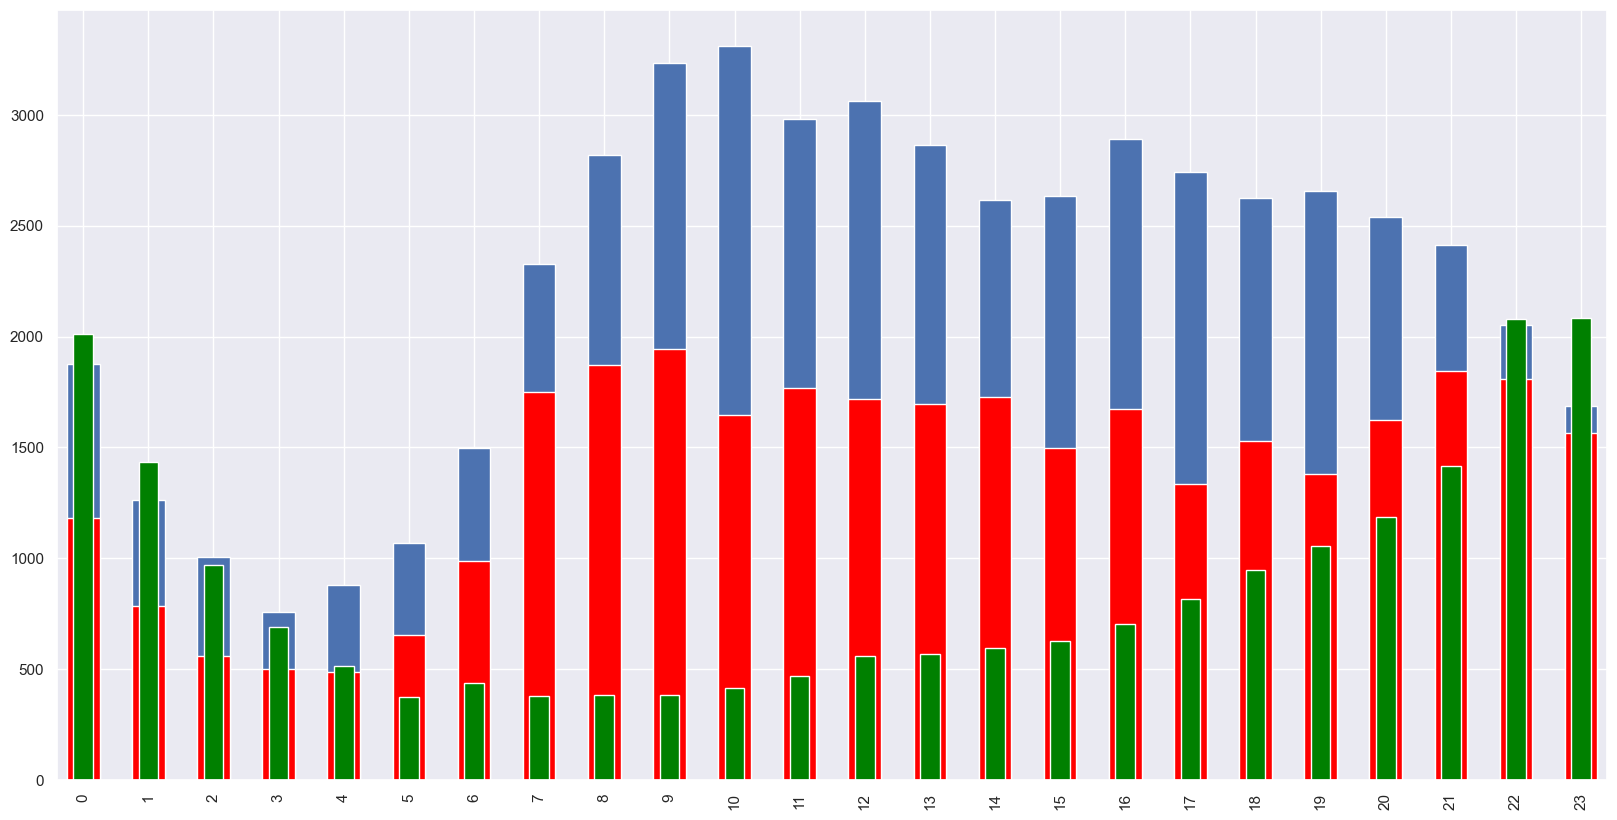

In [164]:
fig = plt.figure(figsize=(20,10))
df_dec22[df_dec22["complaint_type"]=="HEAT/HOT WATER"]['hour'].value_counts().sort_index().plot(kind="bar")
df_dec22[df_dec22["complaint_type"]=="Illegal Parking"]['hour'].value_counts().sort_index().plot(kind="bar", color="red")
df_dec22[df_dec22["complaint_type"]=="Noise - Residential"]['hour'].value_counts().sort_index().plot(kind="bar", color="green", width=0.3)

<BarContainer object of 24 artists>

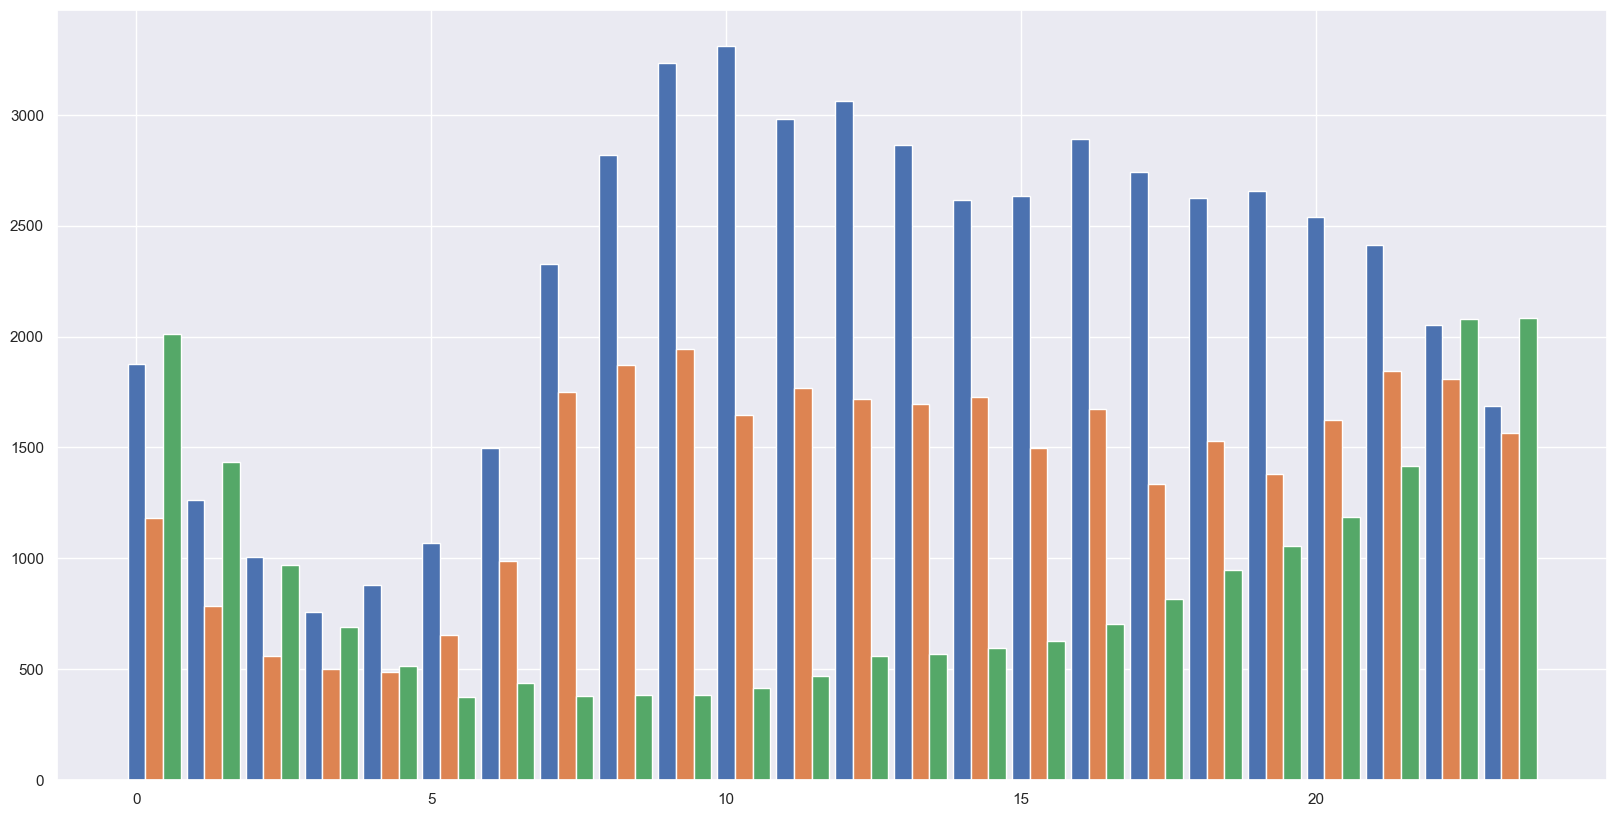

In [161]:
plt.figure(figsize=(20,10))

bar_width = 0.3
bar_positions_a = np.arange(len(range(24)))
bar_positions_b = [pos + bar_width for pos in bar_positions_a]
bar_positions_c = [pos + bar_width for pos in bar_positions_b]

plt.bar(bar_positions_a, list(df_dec22[df_dec22["complaint_type"]=="HEAT/HOT WATER"]['hour'].value_counts().sort_index()), width=0.3)
plt.bar(bar_positions_b, list(df_dec22[df_dec22["complaint_type"]=="Illegal Parking"]['hour'].value_counts().sort_index()), width=0.3)
plt.bar(bar_positions_c, list(df_dec22[df_dec22["complaint_type"]=="Noise - Residential"]['hour'].value_counts().sort_index()), width=0.3)

# **Task 4**

In [173]:
from datetime import datetime

## (\*a.) Calculation of processing time

In [186]:
df["processing_time"]=pd.to_datetime(df["closed_date"])-pd.to_datetime(df["created_date"])

In [205]:
df[["agency_name", "processing_time"]]

,agency_name,processing_time
0,New York City Police Department,0 days 00:24:36
1,New York City Police Department,0 days 00:27:38
2,New York City Police Department,0 days 01:01:06
3,Department of Health and Mental Hygiene,2 days 07:50:52
4,New York City Police Department,0 days 00:30:51
...,...,...
299995,New York City Police Department,0 days 00:23:15
299996,New York City Police Department,0 days 00:43:04
299997,New York City Police Department,0 days 00:18:57
299998,New York City Police Department,0 days 02:30:54


## (\*b.) Defining 3 fastest and 3 slowest agencies

In [200]:
med_process_by_agency = df.groupby('agency_name')['processing_time'].median().sort_values(ascending=False)
med_process_by_agency

agency_name
Taxi and Limousine Commission                    67 days 20:07:01
Economic Development Corporation          32 days 15:37:58.500000
Department of Buildings                    7 days 13:53:57.500000
Office of Technology and Innovation               6 days 23:41:29
Department of Sanitation                          4 days 13:04:53
                                                    ...          
Department of Transportation                      0 days 20:16:03
Department of Environmental Protection            0 days 19:40:30
Department of Homeless Services                   0 days 07:16:37
New York City Police Department                   0 days 01:04:58
Department of Health and Mental Hygiene           0 days 00:00:00
Name: processing_time, Length: 14, dtype: timedelta64[ns]